In [ ]:
pip install praw vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 9.7 MB/s eta 0:00:00


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Analyzing post: Lad wrote a Python script to download Alexa voice recordings, he didn't expect this email. (12337 upvotes)
URL: https://i.redd.it/2s0dj8ob12u41.png


<ipython-input-3-0605aa2e15a3>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


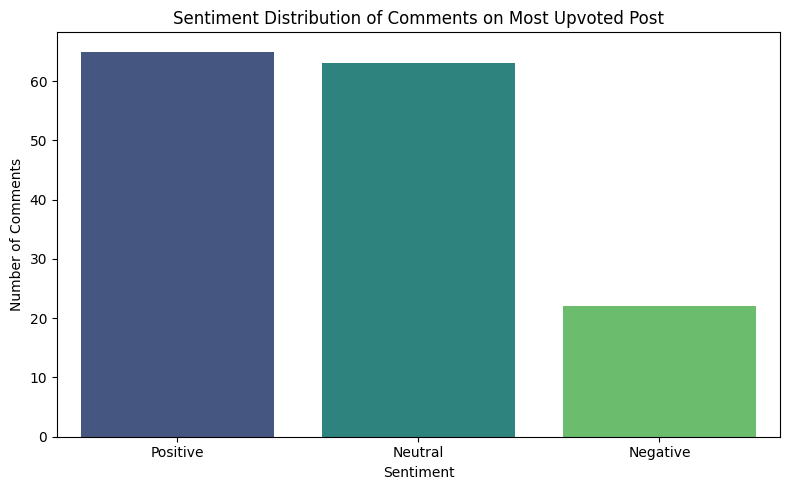

In [ ]:
import praw
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
client_id = 'SwiZpLVMOf9z_XTpJCF0pA'
client_secret = 'L2xq30TATixyLbVAgO3VdD1YNchU2A'
user_agent = 'MyRedditApp/1.0 by KnownComplaint82'
# Initialize Reddit API
reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    user_agent=user_agent
)

# Get the most upvoted post from r/Python (you can change the subreddit)
subreddit = reddit.subreddit("Python")
top_post = next(subreddit.top(limit=1))  # Top post of all time; change to `.hot()` or `.new()` if needed

print(f"Analyzing post: {top_post.title} ({top_post.score} upvotes)")
print(f"URL: {top_post.url}")

# Fetch comments
top_post.comments.replace_more(limit=0)
comments = [comment.body for comment in top_post.comments.list()]

# Sentiment analysis
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df = pd.DataFrame(comments, columns=["Comment"])
df['Sentiment'] = df['Comment'].apply(get_sentiment)

# Plot sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title("Sentiment Distribution of Comments on Most Upvoted Post")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.tight_layout()
plt.show()
